In [124]:
import pandas as pd 
import numpy as np

In [125]:
url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
medical_data = pd.read_csv(url)

In [126]:
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [127]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<!-- visualization to exploer data (EDA) -->

In [129]:
import seaborn as sns 
import matplotlib.pyplot as plt 

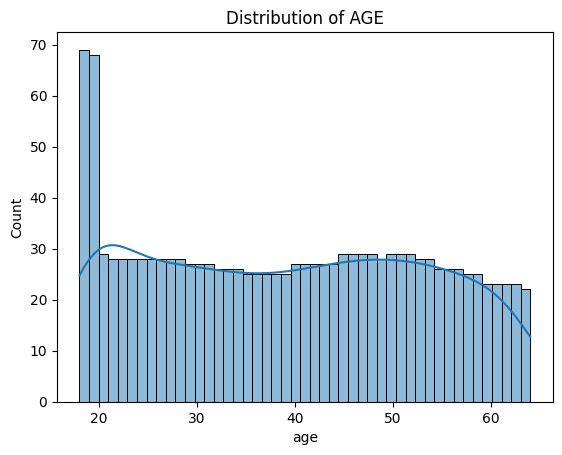

In [130]:
sns.histplot(medical_data,
                   x='age',
                   bins=47,
                   kde=True)

plt.title('Distribution of AGE')
plt.show()

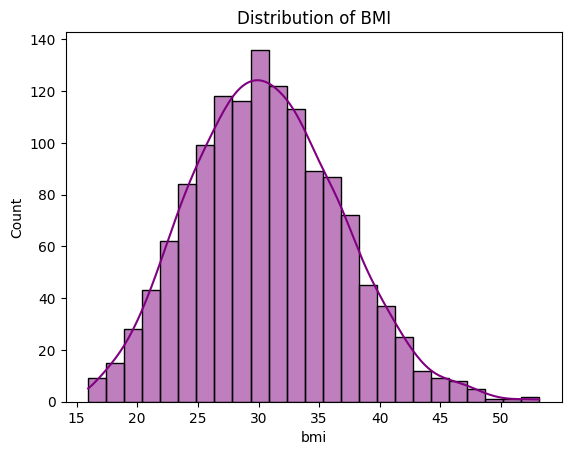

In [131]:
sns.histplot(medical_data,
                   x='bmi',
                   kde=True,
                   color='purple')

plt.title('Distribution of BMI')
plt.show()

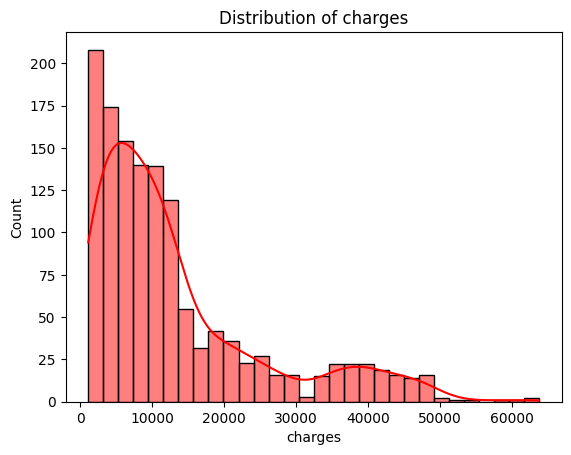

In [132]:
sns.histplot(medical_data,
                   x='charges',
                   kde=True,
                   color='red')

plt.title('Distribution of charges')
plt.show()

<!-- the charges distribution (skwed positive) -->

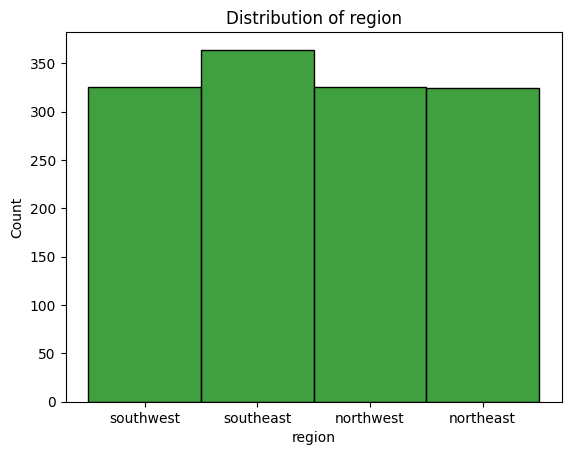

In [133]:
sns.histplot(medical_data,
                   x='region',
                   color='green')

plt.title('Distribution of region')
plt.show()

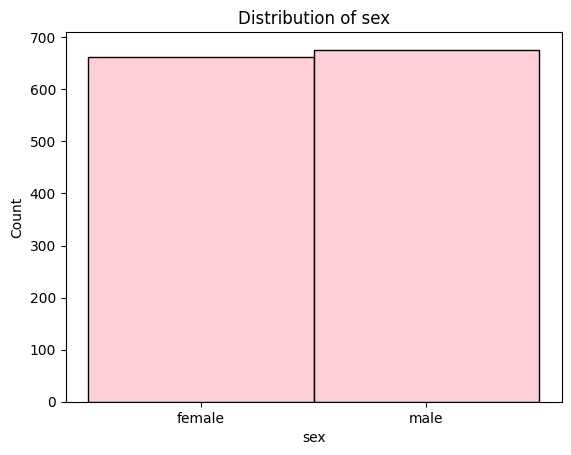

In [134]:
fig = sns.histplot(medical_data,
                   x='sex',
                   color='pink')

plt.title('Distribution of sex')
plt.show()

<!-- somker or non report -->

In [135]:
medical_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

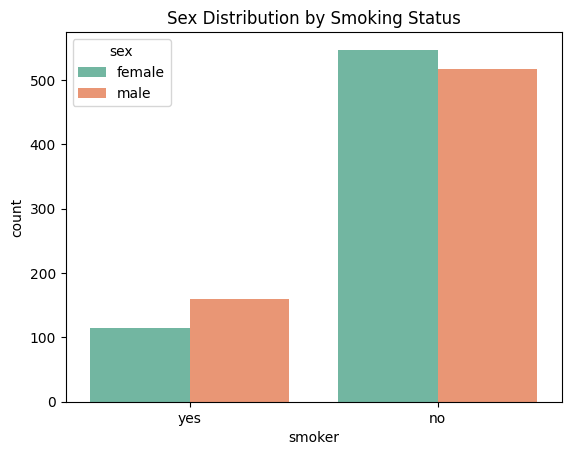

In [136]:
sns.countplot(medical_data,
              x='smoker',
              hue='sex',
              palette='Set2')

plt.title('Sex Distribution by Smoking Status')
plt.show()

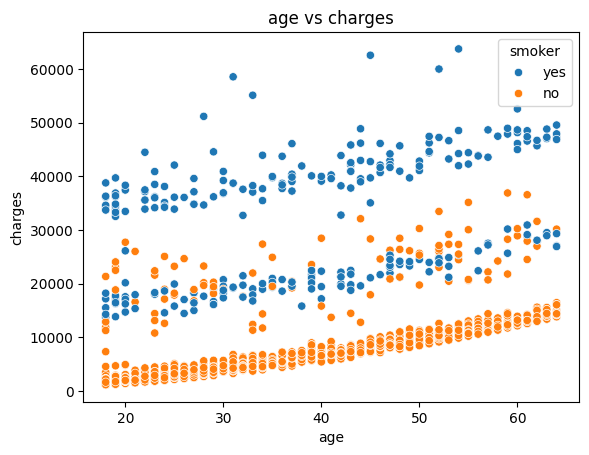

In [137]:
sns.scatterplot(
           medical_data,
           x='age',
           y='charges',
           hue=('smoker')

)
plt.title('age vs charges')
plt.show()

<!-- from plot we can see(3cluster) the non somker ,Younger in age have a charges below than smoker and older  -->

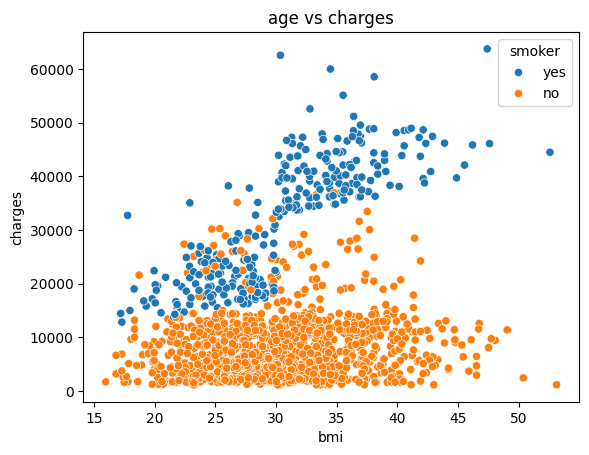

In [138]:
sns.scatterplot(
           medical_data,
           x='bmi',
           y='charges',
           hue=('smoker')

)
plt.title('age vs charges')
plt.show()

<!-- the higer caharges for (smoker and fat)  -->

In [139]:
medical_data['smoker'] = medical_data['smoker'].map({'yes': 1 , 'no':0})

In [140]:
medical_data['sex'] = medical_data['sex'].map({'male': 1, 'female': 0})

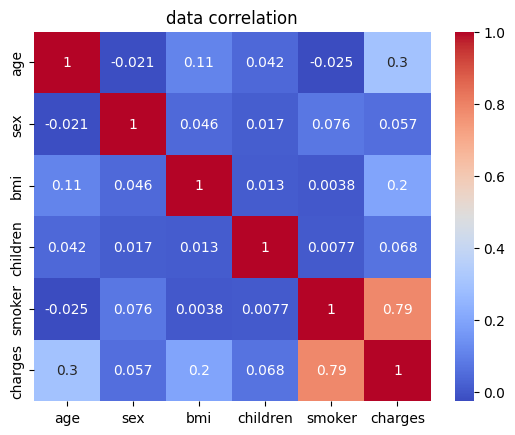

In [141]:
numerc= medical_data.select_dtypes(include='number')
sns.heatmap(numerc.corr(),
            annot=True ,
            cmap="coolwarm")
plt.title('data correlation')
plt.show()

<!-- from heatmap we can see a tow most important categoures for  -->

In [142]:
# non-smokers بعد الترميز:
non_smoker = medical_data[medical_data.smoker == 0]
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,southwest,11411.68500
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350


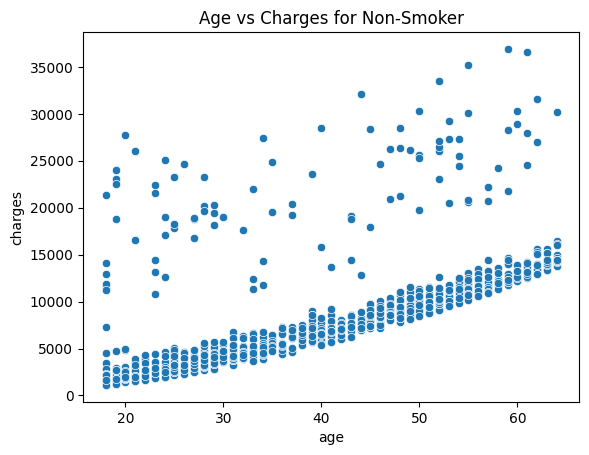

In [143]:
sns.scatterplot(
    data=non_smoker,
    x='age',
    y='charges'
)

plt.title('Age vs Charges for Non-Smoker')
plt.show()


<!-- charges can calculate by th equation (x *age+b) -->

In [144]:
def estimate_charges(w,age,b):
    return w*age+b

In [145]:
w = 200
b = -850

In [146]:
ages =non_smoker.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [147]:
estaimeted=  estimate_charges(w,ages, b)

Text(0.5, 1.0, 'Age vs Estimated for Non-Smoker')

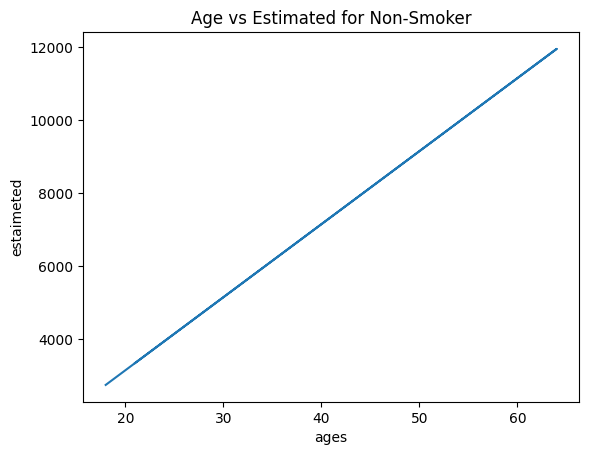

In [148]:
plt.plot(ages,estaimeted)
plt.xlabel('ages')
plt.ylabel('estaimeted')
plt.title('Age vs Estimated for Non-Smoker')


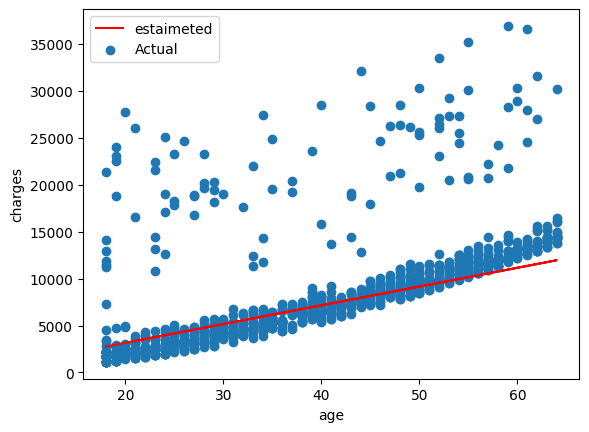

In [149]:
target =  non_smoker.charges
plt.plot(ages, estaimeted , 'r')
plt.scatter(ages,target,)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend(['estaimeted', 'Actual'])

<!--RMSE = SQUARE ROOT FOR SUMTION(PREDECT -  ACTUAL)^2 / N -->

<!-- linearRegration model and split data -->

### machine learning cycel:
#1model
#2cost function
#3optemaizer 

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [161]:
le = LabelEncoder()
non_smoker['region'] = le.fit_transform(non_smoker['region'])
non_smoker['region']

C:\Users\USERR\AppData\Local\Temp\ipykernel_26256\561333236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_smoker['region'] = le.fit_transform(non_smoker['region'])


1       2
2       2
3       1
4       1
5       2
       ..
1332    3
1333    1
1334    0
1335    2
1336    3
Name: region, Length: 1064, dtype: int64

In [164]:
X = non_smoker.drop('charges', axis=1)
y = non_smoker['charges']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


In [166]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [167]:
y_pred = model.predict(X_test)

In [168]:
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMS:", rms)

RMS: 3438.625482137368


### improvment for model and data by std:

<!-- calculate a mean and standerd but not change on data untill transform  -->

In [173]:
numerc_cols =['age', 'bmi' ,'children']
scaler  =  StandardScaler()
scaler.fit(medical_data[numerc_cols])

,copy,True
,with_mean,True
,with_std,True


In [180]:
scaled_inputs = scaler.fit_transform(medical_data[numerc_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [183]:
le = LabelEncoder()

cat_cols = ['sex', 'region', 'smoker']   

for col in cat_cols:
    medical_data[col] = le.fit_transform(medical_data[col])


In [178]:
y = medical_data['charges']


In [181]:
scaled_df = pd.DataFrame(scaled_inputs, columns=numerc_cols)


In [185]:
cat_df = medical_data[cat_cols]  
X = pd.concat([scaled_df, cat_df], axis=1)


In [186]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


In [187]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [188]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

32402757.391010456